In [2]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
# ndarray = array of array
iris = datasets.load_iris()
# To simplify things, we take just the first two feature columns
# colon (:) pada array menunjukkan start:end index berapa
# iris.data[:], artinya dari awal-akhir sesuai length yg dimilikinya berapa
X = iris.data[:,:2]
# print(iris.DESCR)
# Also, the two non-linearly separable classes are labeled with 
# the same category, ending up with a binary classification problem.
# True * 1 = 1, pada python, bolean bisa dikalikan dengan integer, nilai True=1, False=0
# class numpy.ndarray akan me-loop satu persatu untuk dicek apakah nilainya 0 atau bukan, 
# kalau nilainya bukan 0 maka akan dikalikan dengan 1
y = (iris.target != 0) * 1

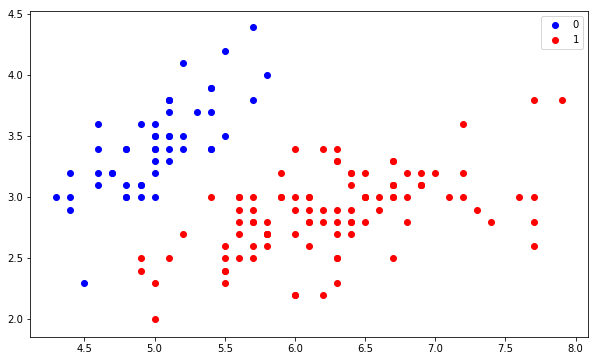

In [5]:
# ukuran graph nya
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

In [1]:
# contoh hyperparameter
class LogisticRegression:
#     lr : learning rate
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
#     logistic function, biasa disebut juga sigmoid
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
#     
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
# weights initialization
#         np.zeros : create matrix-0 1D which its width by argument
        X_width = X.shape[1]
        self.theta = np.zeros(X_width)
# berapa kali iterasi
        for i in range(self.num_iter):
#           np.dot : mengalikan matrix yg dimasukkan, returnnya matrix juga
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
			# derivative function, mengubah fungsi f jadi f' lalu jarak x0 x1 jadi lebih pendek         
        	# (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
			# gradient descent itu derivative dari loss function
        	#X.T itu ndarray X di transpose         
#           h itu logistic function   
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)

            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()


In [ ]:
model = LogisticRegression(lr=0.1,num_iter=300000)

In [10]:
%time model.fit(X,y)

CPU times: user 38.2 s, sys: 7.32 ms, total: 38.2 s
Wall time: 19.2 s


In [12]:
preds = model.predict(X)
(preds == y).mean()

1.0

In [13]:
model.theta

array([-25.89066442,  12.523156  , -13.40150447])

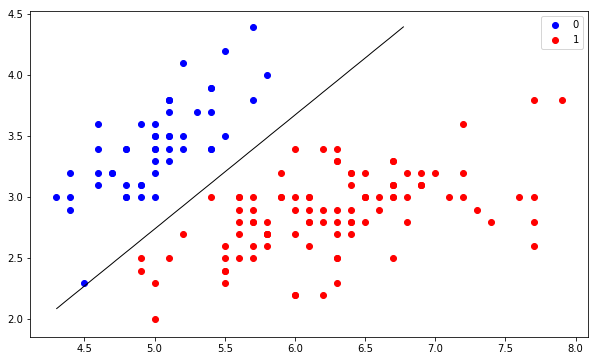

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

In [29]:
z = np.dot(X,np.zeros(X.shape[1]))
print(X.T.shape)
h = 1 / (1 + np.exp(-z))
# gradient = np.dot(X.T, (h - y)) / y.size

(2, 150)
